In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

import pickle

# Import Data Frame 
data = pd.read_csv('DATASET/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

In [2]:
# Rename the columns we will be working on 
data = data.rename(columns = {
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value',
    'VORJAHRESWERT': 'Previous Year',
    'VERAEND_VORMONAT_PROZENT':'Event_Prior_Month_Percent',
    'VERAEND_VORJAHRESMONAT_PROZENT':'Event_Previous Month_Percentage',
    'ZWOELF_MONATE_MITTELWERT':'Tweleve_Months_Average'
})

# Convert german to english
data['Category'].replace(['Alkoholunfälle', 'Fluchtunfälle','Verkehrsunfälle'],['alcohol accidents','escape accidents','traffic accidents'], inplace=True)
data['Accident_Type'].replace(['insgesamt' ,'Verletzte und Getötete', 'mit Personenschäden'],['all in all','injured and killed','with personal injury'], inplace=True)

#Select only important columns
features = ['Category', 'Accident_Type', 'Year', 'Month', 'Value']

#Make the data only the important columns
data = data[features]

In [3]:
#data visuailaization 1st 

In [4]:
# Remove null values
data = data.dropna()

# Remove the 'Summe' from Month column 
data = data[data['Month'] != 'Summe']

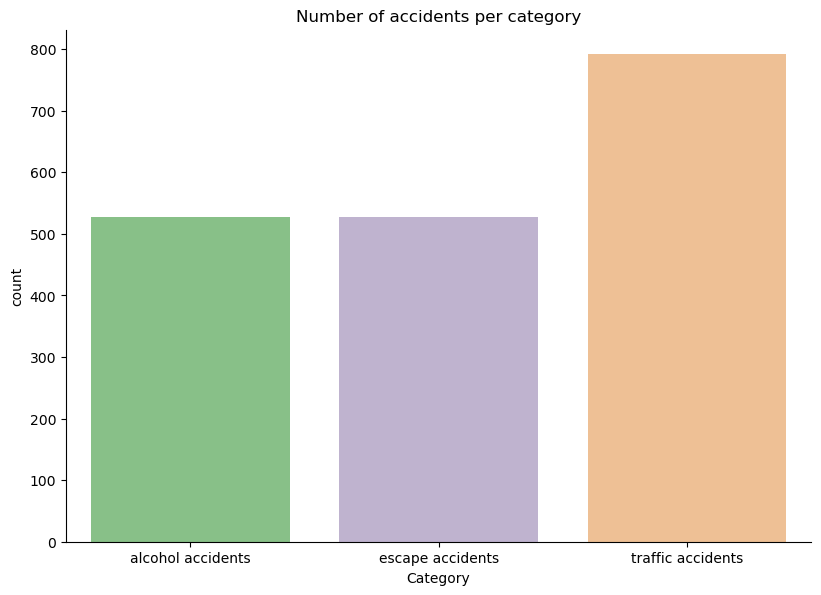

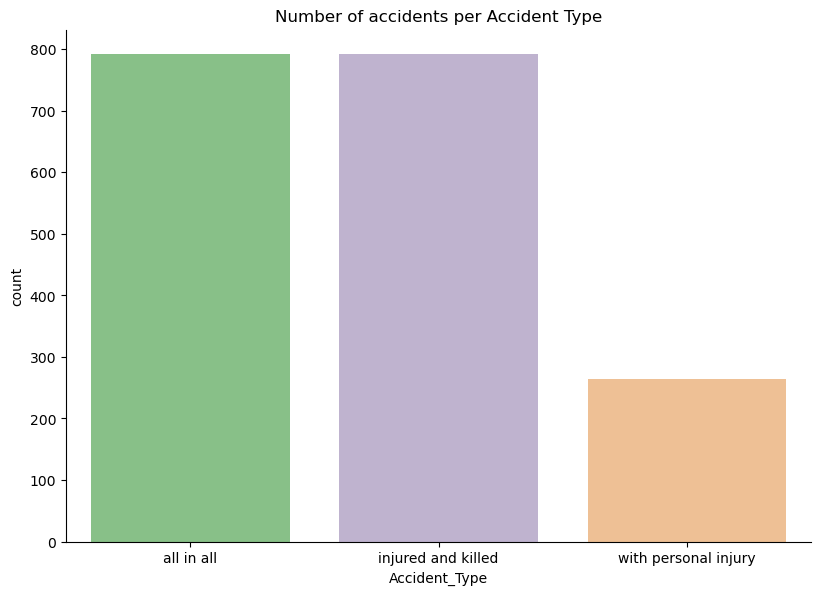

In [5]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)

In [6]:
# Get only month numbers in Month column
data['Month'] = data['Month'].str[-2:]
data['Month'] = data['Month'].astype(int)

# Get data from 2010 to 2020
data = data[data['Year'] < 2021]

#Change the Categorical variable to numeric
data['Category'].replace(['alcohol accidents' ,'escape accidents' ,'traffic accidents'],[0,1,2], inplace=True)
data['Accident_Type'].replace(['all in all', 'injured and killed' ,'with personal injury'], [0,1,2], inplace=True)


# Specify the features
features = ['Category', 'Accident_Type', 'Year', 'Month']
X = data[features]

# Specify the prediction value
Y = data.Value

# Specify train and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

/var/folders/x1/0zw294_13mx9wkf_d65dhwbc0000gn/T/ipykernel_9929/2293243013.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'].replace(['alcohol accidents' ,'escape accidents' ,'traffic accidents'],[0,1,2], inplace=True)
/var/folders/x1/0zw294_13mx9wkf_d65dhwbc0000gn/T/ipykernel_9929/2293243013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accident_Type'].replace(['all in all', 'injured and killed' ,'with personal injury'], [0,1,2], inplace=True)


In [7]:
#regressor = RandomForestRegression()
regressor = RandomForestRegressor(n_estimators=53,random_state=0)

# Fit the model with trined data
regressor.fit(X_train.values,Y_train.values)

# Save the model
pickle.dump(regressor, open('model.pkl','wb'))

In [8]:
y_pred = regressor.predict(X_test)
print("Random Forest :")
print("MAE : {:.8f}".format(mean_absolute_error(y_pred, Y_test)))
print("MSE : {:.8f}".format(mean_squared_error(y_pred, Y_test)))
print("RMSE : {:.8f}".format(mean_squared_error(y_pred, Y_test,squared=False)))
print("MedAE : {:.8f}".format(median_absolute_error(y_pred, Y_test)))
print("R2 : {:.8f}".format(r2_score(y_pred, Y_test)))



Random Forest :
MAE : 53.26121118
MSE : 12055.78870426
RMSE : 109.79885566
MedAE : 14.71698113
R2 : 0.99161312


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [9]:
#random forest for all 2021

# test the output by for jan 0,0,2021,10
y_pred_1 = regressor.predict([[0,0,2021,1]])
y_pred_2 = regressor.predict([[0,0,2021,2]])
y_pred_3 = regressor.predict([[0,0,2021,3]])
y_pred_4 = regressor.predict([[0,0,2021,4]])
y_pred_5 = regressor.predict([[0,0,2021,5]])
y_pred_6 = regressor.predict([[0,0,2021,6]])
y_pred_7 = regressor.predict([[0,0,2021,7]])
y_pred_8 = regressor.predict([[0,0,2021,8]])
y_pred_9 = regressor.predict([[0,0,2021,9]])
y_pred_10 = regressor.predict([[0,0,2021,10]])
y_pred_11 = regressor.predict([[0,0,2021,11]])
y_pred_12 = regressor.predict([[0,0,2021,12]])
y_pred_final = y_pred_1+y_pred_2+y_pred_3+y_pred_4+y_pred_5+y_pred_6+y_pred_7+y_pred_8+y_pred_9+y_pred_10+y_pred_11+y_pred_12



print("Jan decison tree: % d\n"% y_pred_1)
print("Jan decison tree: % d\n"% y_pred_2)
print("Jan decison tree: % d\n"% y_pred_3)
print("Jan decison tree: % d\n"% y_pred_4)
print("Jan decison tree: % d\n"% y_pred_5)
print("Jan decison tree: % d\n"% y_pred_6)
print("Jan decison tree: % d\n"% y_pred_7)
print("Jan decison tree: % d\n"% y_pred_8)
print("Jan decison tree: % d\n"% y_pred_9)
print("Jan decison tree: % d\n"% y_pred_10)
print("Jan decison tree: % d\n"% y_pred_11)
print("Jan decison tree: % d\n"% y_pred_12)
print("Final for jan 2021 % d\n"% y_pred_final)

# print the predicted price





Jan decison tree:  28

Jan decison tree:  36

Jan decison tree:  31

Jan decison tree:  29

Jan decison tree:  37

Jan decison tree:  39

Jan decison tree:  48

Jan decison tree:  44

Jan decison tree:  45

Jan decison tree:  32

Jan decison tree:  22

Jan decison tree:  18

Final for jan 2021  413

